In [1]:
!pip install scipy

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [5]:
imagem = cv2.imread("/content/raca-de-cachorro-preto-e-branco-1280x720.jpg")

# Atividade 01
Reescreva os algoritmos da semana anterior para imagens coloridas

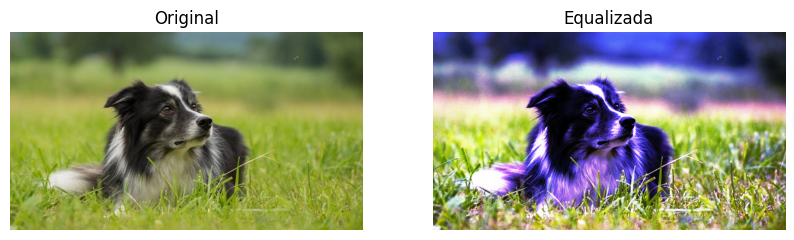

In [6]:
b, g, r = cv2.split(imagem)
b_eq = cv2.equalizeHist(b)
g_eq = cv2.equalizeHist(g)
r_eq = cv2.equalizeHist(r)
imagem_equalizada = cv2.merge([b_eq, g_eq, r_eq])

# Exibir as imagens
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(imagem_equalizada, cv2.COLOR_BGR2RGB))
plt.title("Equalizada")
plt.axis('off')
plt.show()

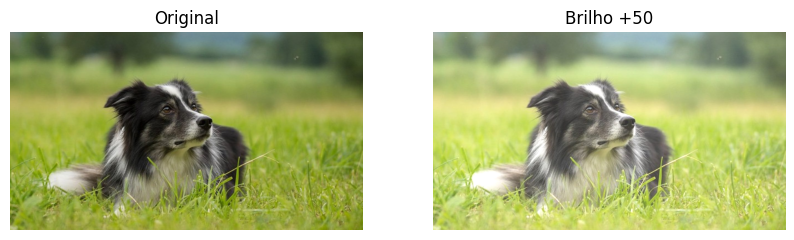

In [9]:
valor_brilho = 50
imagem_brilho = cv2.add(imagem, valor_brilho)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(imagem_brilho, cv2.COLOR_BGR2RGB))
plt.title(f"Brilho +{valor_brilho}")
plt.axis('off')
plt.show()

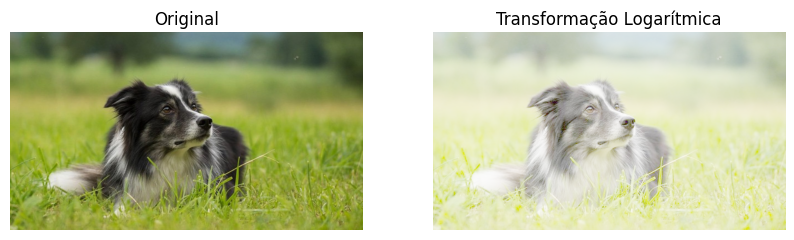

In [16]:
canais = cv2.split(imagem)
canais_log = []
for canal in canais:
    canal_log = np.uint8(255 * np.log(1 + canal) / np.log(256))
    canais_log.append(canal_log)
imagem_log = cv2.merge(canais_log)

# Exibir as imagens
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(imagem_log, cv2.COLOR_BGR2RGB))
plt.title("Transformação Logarítmica")
plt.axis('off')
plt.show()

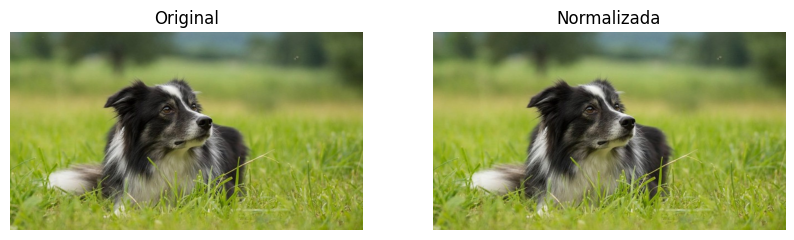

In [17]:
def normalizar_imagem_colorida(imagem):
    canais = cv2.split(imagem)
    canais_normalizados = []
    for canal in canais:
        canal_norm = cv2.normalize(canal, None, 0, 255, cv2.NORM_MINMAX)
        canais_normalizados.append(canal_norm)
    return cv2.merge(canais_normalizados)

# Normalizar a imagem
imagem_normalizada = normalizar_imagem_colorida(imagem)

# Exibir as imagens
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(imagem_normalizada, cv2.COLOR_BGR2RGB))
plt.title("Normalizada")
plt.axis('off')
plt.show()

In [18]:
tamanho_kernel = 5

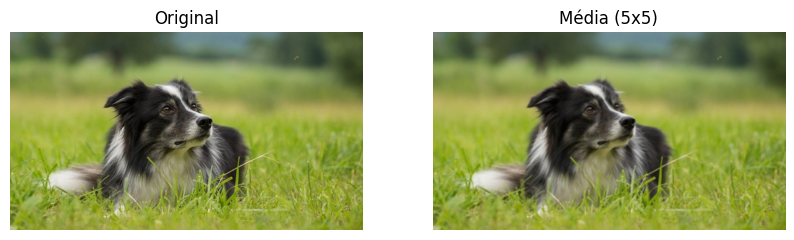

In [19]:
imagem_suavizada = cv2.blur(imagem, (tamanho_kernel, tamanho_kernel))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(imagem_suavizada, cv2.COLOR_BGR2RGB))
plt.title(f"Média ({tamanho_kernel}x{tamanho_kernel})")
plt.axis('off')
plt.show()

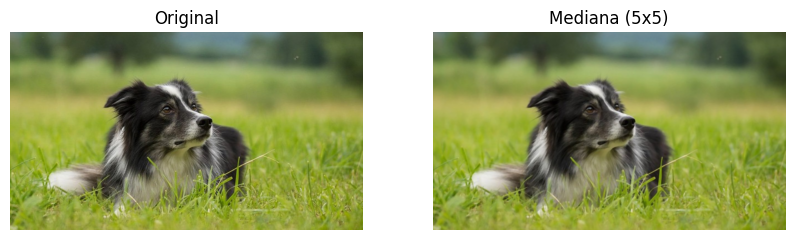

In [20]:
imagem_suavizada1 = cv2.medianBlur(imagem, tamanho_kernel)

# Exibir as imagens
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(imagem_suavizada1, cv2.COLOR_BGR2RGB))
plt.title(f"Mediana ({tamanho_kernel}x{tamanho_kernel})")
plt.axis('off')
plt.show()

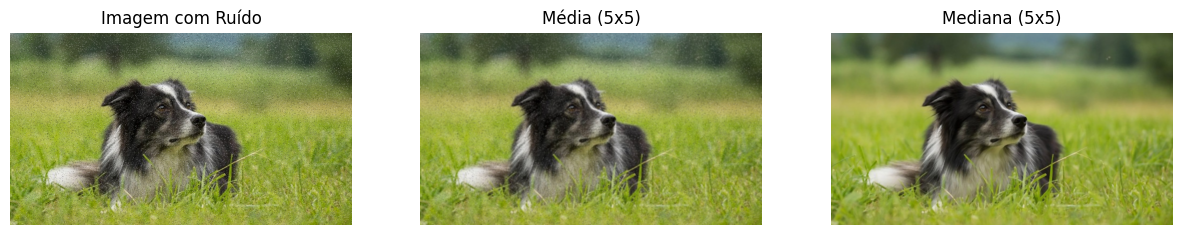

Análise Estatística - Imagem com Ruído:
  Mínimo: 0
  Máximo: 255
  Média: 125.98
  Variância: 2383.00
  Assimetria: -0.45
  Curtose: 0.78

Análise Estatística - Filtro da Média:
  Mínimo: 1
  Máximo: 242
  Média: 125.98
  Variância: 1493.15
  Assimetria: -0.85
  Curtose: 0.23

Análise Estatística - Filtro da Mediana:
  Mínimo: 1
  Máximo: 243
  Média: 125.93
  Variância: 1632.45
  Assimetria: -0.87
  Curtose: 0.21



In [24]:
def analise_estatistica(imagem, nome):
    imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    descricao = stats.describe(imagem_cinza.ravel())
    print(f"Análise Estatística - {nome}:")
    print(f"  Mínimo: {descricao.minmax[0]}")
    print(f"  Máximo: {descricao.minmax[1]}")
    print(f"  Média: {descricao.mean:.2f}")
    print(f"  Variância: {descricao.variance:.2f}")
    print(f"  Assimetria: {descricao.skewness:.2f}")
    print(f"  Curtose: {descricao.kurtosis:.2f}")
    print()


def adicionar_ruido_sal_pimenta(imagem, prob=0.05):
    output = np.copy(imagem)
    # Adicionar ruído sal
    salt = np.random.rand(*imagem.shape[:2])
    output[salt < prob / 2] = 255
    # Adicionar ruído pimenta
    pepper = np.random.rand(*imagem.shape[:2])
    output[pepper < prob / 2] = 0
    return output

imagem_ruidosa = adicionar_ruido_sal_pimenta(imagem)

tamanho_kernel = 5
imagem_media = cv2.blur(imagem_ruidosa, (tamanho_kernel, tamanho_kernel))
imagem_mediana = cv2.medianBlur(imagem_ruidosa, tamanho_kernel)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(imagem_ruidosa, cv2.COLOR_BGR2RGB))
plt.title("Imagem com Ruído")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(imagem_media, cv2.COLOR_BGR2RGB))
plt.title(f"Média ({tamanho_kernel}x{tamanho_kernel})")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(imagem_mediana, cv2.COLOR_BGR2RGB))
plt.title(f"Mediana ({tamanho_kernel}x{tamanho_kernel})")
plt.axis('off')
plt.show()

analise_estatistica(imagem_ruidosa, "Imagem com Ruído")
analise_estatistica(imagem_media, "Filtro da Média")
analise_estatistica(imagem_mediana, "Filtro da Mediana")

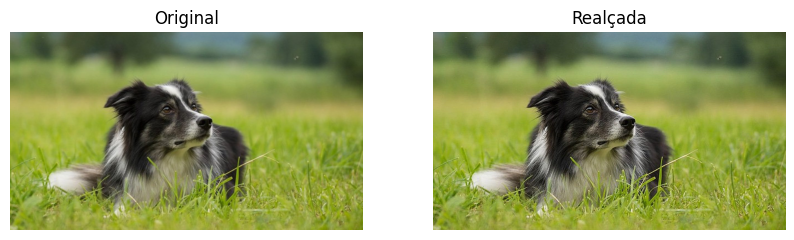

In [25]:
def filtro_realce_colorido(imagem):
    kernel_aguçamento = np.array([
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]
    ])
    return cv2.filter2D(imagem, -1, kernel_aguçamento)

imagem_realcada = filtro_realce_colorido(imagem)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(imagem_realcada, cv2.COLOR_BGR2RGB))
plt.title("Realçada")
plt.axis('off')
plt.show()

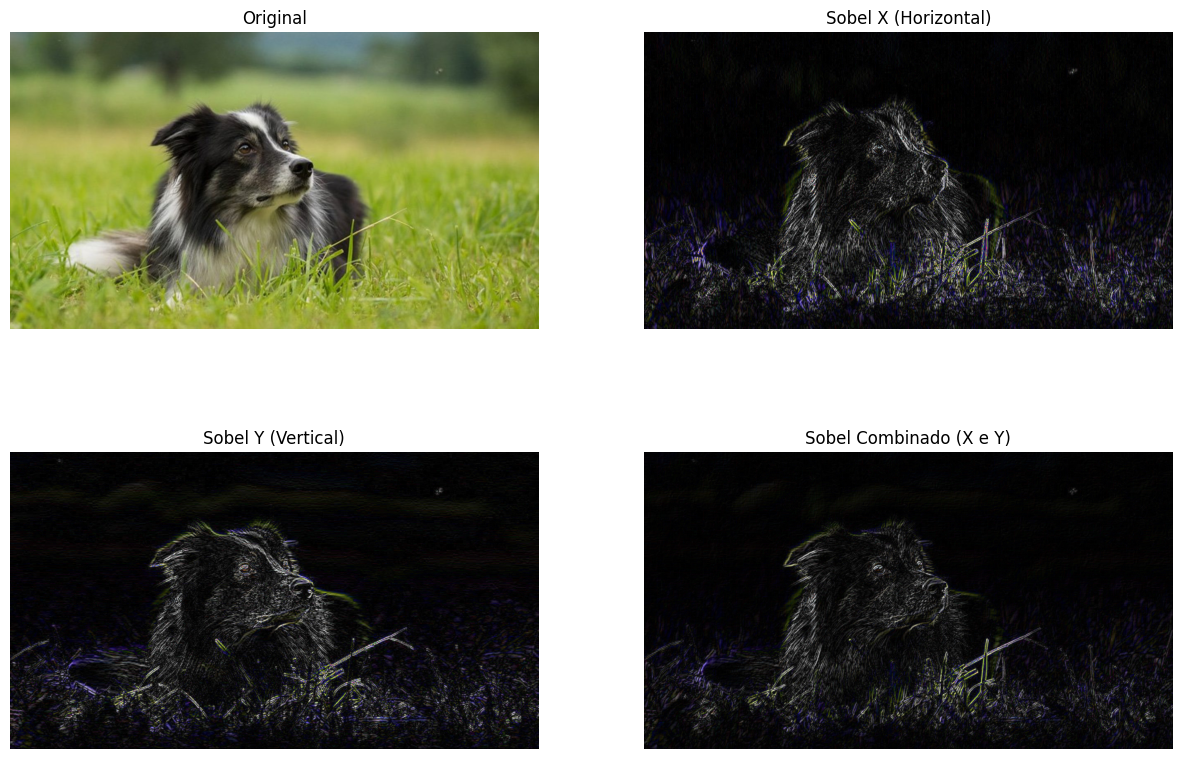

In [26]:
b, g, r = cv2.split(imagem)

sobel_x_b = cv2.Sobel(b, cv2.CV_64F, 1, 0, ksize=3)
sobel_x_g = cv2.Sobel(g, cv2.CV_64F, 1, 0, ksize=3)
sobel_x_r = cv2.Sobel(r, cv2.CV_64F, 1, 0, ksize=3)
sobel_x = cv2.merge([sobel_x_b, sobel_x_g, sobel_x_r])

sobel_y_b = cv2.Sobel(b, cv2.CV_64F, 0, 1, ksize=3)
sobel_y_g = cv2.Sobel(g, cv2.CV_64F, 0, 1, ksize=3)
sobel_y_r = cv2.Sobel(r, cv2.CV_64F, 0, 1, ksize=3)
sobel_y = cv2.merge([sobel_y_b, sobel_y_g, sobel_y_r])

sobel_combinado = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

sobel_x = np.uint8(np.absolute(sobel_x))
sobel_y = np.uint8(np.absolute(sobel_y))
sobel_combinado = np.uint8(np.absolute(sobel_combinado))

plt.figure(figsize=(15, 10))

# Imagem original
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

# Sobel na direção x (horizontal)
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(sobel_x, cv2.COLOR_BGR2RGB))
plt.title("Sobel X (Horizontal)")
plt.axis('off')

# Sobel na direção y (vertical)
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(sobel_y, cv2.COLOR_BGR2RGB))
plt.title("Sobel Y (Vertical)")
plt.axis('off')

# Sobel combinado (x e y)
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(sobel_combinado, cv2.COLOR_BGR2RGB))
plt.title("Sobel Combinado (X e Y)")
plt.axis('off')

plt.show()

# atividade 02
Escreva um algoritmo que conte a quantidade de cores em uma imagem

In [28]:
if imagem is None:
    print("Erro ao carregar a imagem. Verifique o caminho.")
else:
    fator_quantizacao = 64
    imagem_quantizada = np.uint8(imagem // (256 // fator_quantizacao) * (256 // fator_quantizacao))

    pixels = imagem_quantizada.reshape(-1, 3)

    pixels = [tuple(pixel) for pixel in pixels]
    cores_unicas = set(pixels)
    quantidade_cores = len(cores_unicas)

    print(f"A imagem contém {quantidade_cores} cores únicas após quantização.")

A imagem contém 10744 cores únicas após quantização.


# atividade 03
Escreva um algoritmo que retorne se uma imagem é classificada como fria ou quente


In [32]:
def classificar_temperatura_imagem(caminho_imagem):
    if imagem is None:
        print("Erro ao carregar a imagem. Verifique o caminho.")
        return

    media_r = np.mean(imagem[:, :, 2])
    media_g = np.mean(imagem[:, :, 1])
    media_b = np.mean(imagem[:, :, 0])

    if media_r > media_b and media_r > media_g:
        print("A imagem é classificada como QUENTE (predomínio de vermelho/laranja/amarelo).")
    elif media_b > media_r and media_b > media_g:
        print("A imagem é classificada como FRIA (predomínio de azul/verde).")
    else:
        print("A imagem é classificada como NEUTRA (sem predomínio claro de cores quentes ou frias).")

classificar_temperatura_imagem(imagem)

A imagem é classificada como NEUTRA (sem predomínio claro de cores quentes ou frias).


In [34]:
def avaliar_imagem(caminho_imagem):
    if imagem is None:
        print("Erro ao carregar a imagem. Verifique o caminho.")
        return

    if len(imagem.shape) == 3:
        print("A imagem é COLORIDA.")
    elif len(imagem.shape) == 2:
        print("A imagem é em NÍVEL DE CINZA.")
    else:
        print("A imagem tem um formato desconhecido.")

avaliar_imagem(imagem)

A imagem é COLORIDA.
